In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv(r'/Users/sumitkumar/Documents/CloudyData/Python/Pandas/airlines_flights_data.csv')

In [3]:
data.head(2)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [13]:
air=data.copy()

In [14]:
air=air.drop(columns=['index'])

In [17]:
air.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [7]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
air.duplicated().sum()

np.int64(0)

### Q.1. What are the airlines in the dataset, accompanied by their frequencies?

In [159]:
Airline_freq=air['airline'].value_counts()
Airline_freq

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

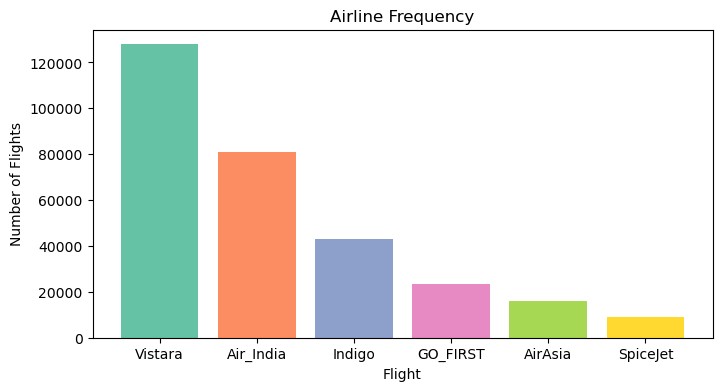

In [160]:
plt.figure(figsize=(8,4))
colors=sns.color_palette("Set2", len(Airline_freq))
plt.bar(Airline_freq.index,Airline_freq.values,color=colors)
plt.title('Airline Frequency')
plt.xlabel('Flight')
plt.ylabel('Number of Flights')
plt.show()

### Q.2. Show Bar Graphs representing the Departure Time & Arrival Time¶


In [23]:
depart=air['departure_time'].value_counts()
depart

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [24]:
arrival=air['arrival_time'].value_counts()
arrival

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

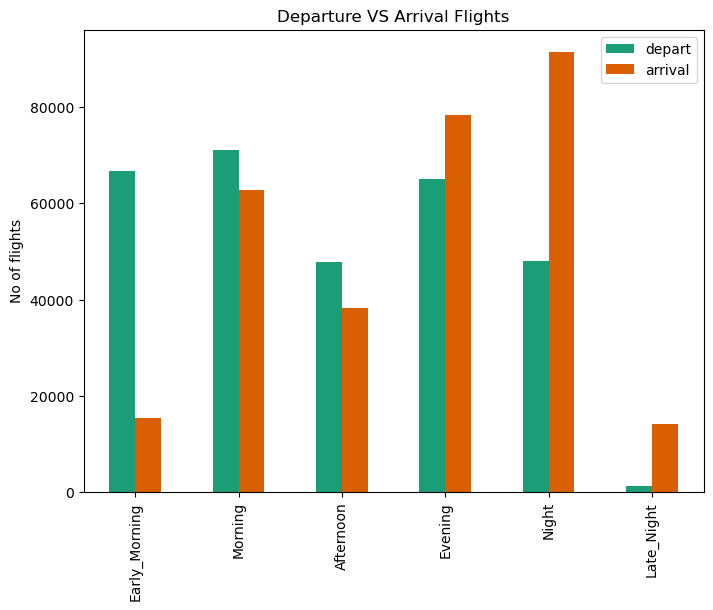

In [74]:
colors1=sns.color_palette("Dark2")
Time_order=['Early_Morning','Morning','Afternoon' ,'Evening','Night','Late_Night']
mix=pd.DataFrame({"depart":depart,"arrival":arrival})
mix=mix.reindex(Time_order)
mix.plot(kind='bar',color=colors1,figsize=(8,6))
plt.ylabel('No of flights')
plt.title('Departure VS Arrival Flights')
plt.show()

### Q.3. Show Bar Graphs representing the Source City & Destination City¶


In [15]:
air.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [28]:
source=air['source_city'].value_counts().sort_values(ascending=False)
source

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [30]:
Destination=air['destination_city'].value_counts().sort_values(ascending=False)
Destination

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

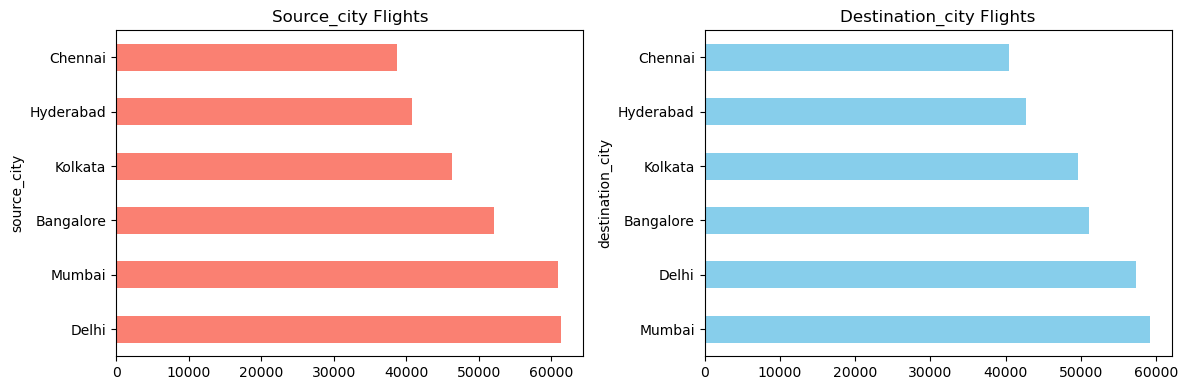

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
source.plot(kind='barh',color="Salmon")
plt.title('Source_city Flights')
plt.subplot(1,2,2)
Destination.plot(kind='barh',color='Skyblue')
plt.title('Destination_city Flights')
plt.tight_layout()
plt.show()

### Q.4. Does price varies with airlines ?

In [57]:
airline_price= air.groupby(['airline','class'])['price'].mean().reset_index()
airline_price

,airline,class,price
0,AirAsia,Economy,4091.072742
1,Air_India,Business,47131.039212
2,Air_India,Economy,7313.682169
3,GO_FIRST,Economy,5652.007595
4,Indigo,Economy,5324.216303
5,SpiceJet,Economy,6179.278881
6,Vistara,Business,55477.027777
7,Vistara,Economy,7806.943645


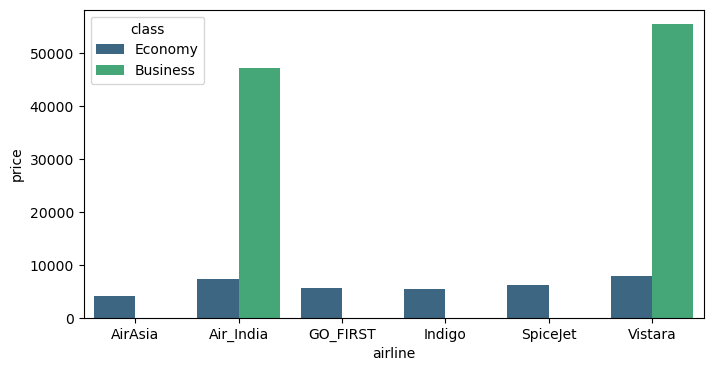

In [59]:
#colors=sns.color_palette('viridis',len(airline_price))
plt.figure(figsize=(8,4))
sns.barplot(data=airline_price,x='airline',y='price',palette='viridis',hue='class')

plt.show()

### Q.5. Does ticket price change based on the departure time and arrival time?¶


In [83]:
Time_order=['Early_Morning','Morning','Afternoon' ,'Evening','Night','Late_Night']
time=air.groupby(['departure_time','arrival_time'])['price'].mean()
time_price=pd.DataFrame(time)
time_price

,departure_time,arrival_time,price
0,Afternoon,Afternoon,14741.746011
1,Afternoon,Early_Morning,21159.511401
2,Afternoon,Evening,15548.836651
3,Afternoon,Late_Night,10811.615662
4,Afternoon,Morning,26056.580994
5,Afternoon,Night,19097.798757
6,Early_Morning,Afternoon,16564.731082
7,Early_Morning,Early_Morning,9540.191523
8,Early_Morning,Evening,24804.077441
9,Early_Morning,Late_Night,29638.037500


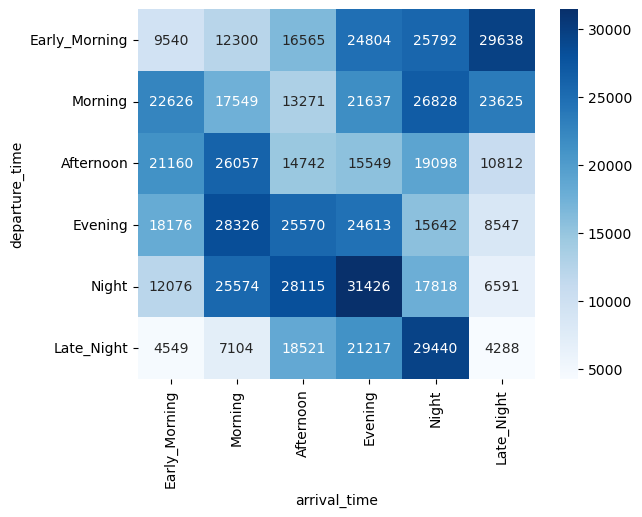

In [155]:
Time_order1=['Early_Morning','Morning','Afternoon' ,'Evening','Night','Late_Night']
time_pivot=time.pivot(index='departure_time',columns='arrival_time',values='price')
time_pivot=time_pivot.reindex(index=Time_order1,columns=Time_order1)
sns.heatmap(time_pivot,annot=True,fmt=".0f",cmap='Blues')

plt.show()

### Q.6. How the price changes with change in Source and Destination?¶


In [94]:
city_price=air.groupby(['source_city','destination_city'])['price'].mean().reset_index()
city_price

,source_city,destination_city,price
0,Bangalore,Chennai,23321.850078
1,Bangalore,Delhi,17723.313972
2,Bangalore,Hyderabad,21226.121192
3,Bangalore,Kolkata,23500.061229
4,Bangalore,Mumbai,23128.618672
5,Chennai,Bangalore,25081.850454
6,Chennai,Delhi,18981.863948
7,Chennai,Hyderabad,21591.345404
8,Chennai,Kolkata,22669.932407
9,Chennai,Mumbai,22765.849647


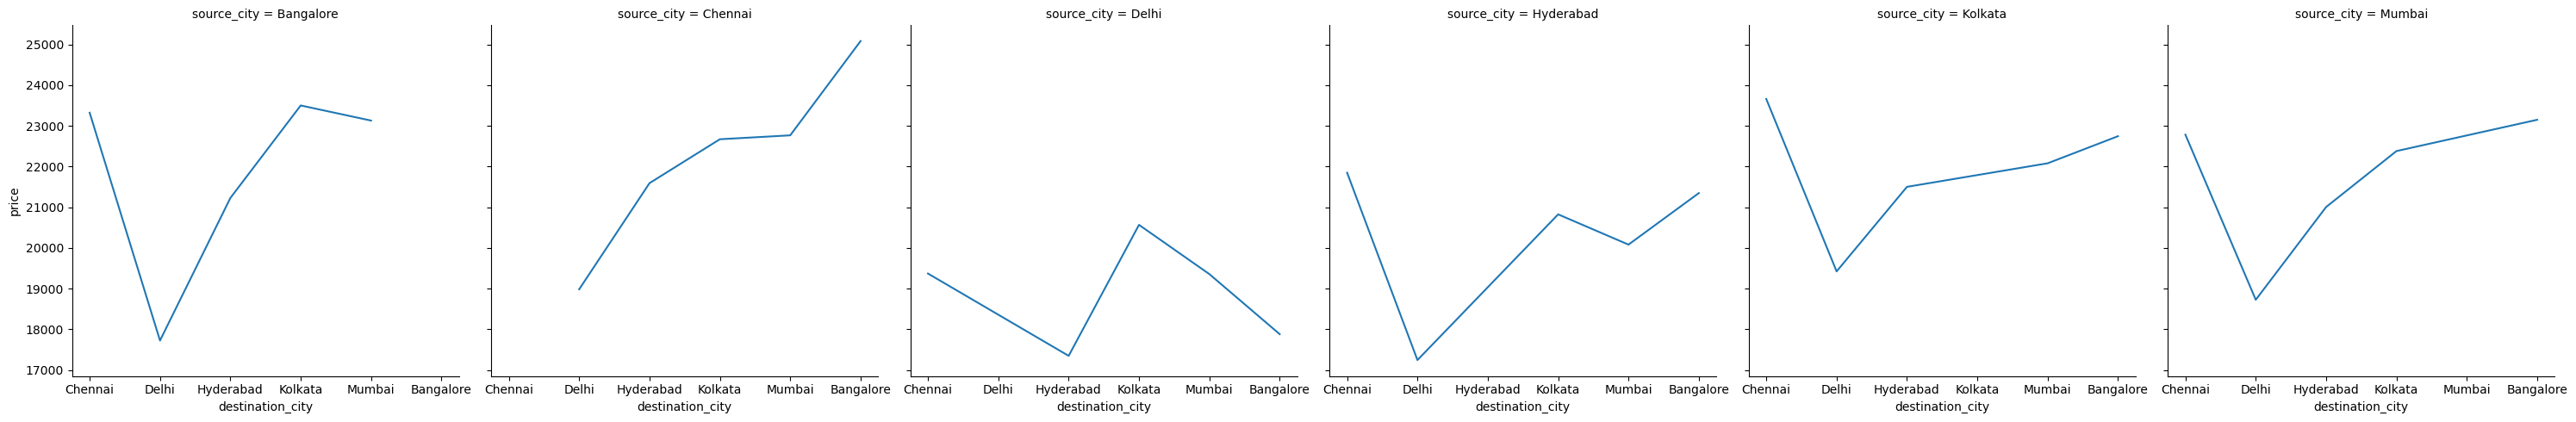

In [100]:
sns.relplot(data=city_price, col='source_city',x='destination_city',y='price',kind='line')
plt.show()

### Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?¶


In [153]:
day_price=air.groupby('days_left')['price'].mean().reset_index()
day_price

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


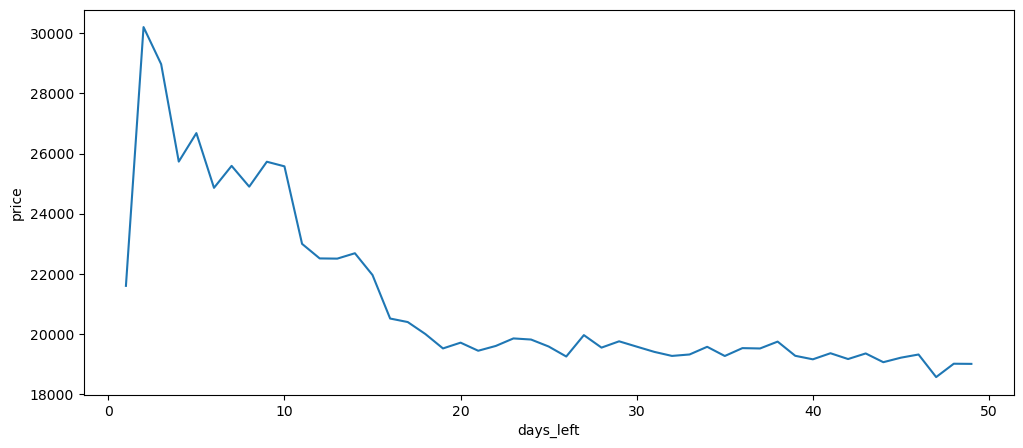

In [154]:
plt.figure(figsize=(12,5))
sns.lineplot(x='days_left',y='price',data=day_price)
plt.show()

### Q.8. How does the ticket price vary between Economy and Business class?¶


In [149]:
class_price=air.groupby('class')['price'].mean().reset_index() # convert into DataFrame
class_price.columns=['Class','Price']# rename columns
class_price

,Class,Price
0,Business,52540.081124
1,Economy,6572.342383


### Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [135]:
x=air[(air['airline']=='Vistara') &(air['source_city']=='Delhi') & (air['destination_city']=='Hyderabad')&(air['class']=='Business')]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [145]:
Avg=x['price'].mean().round(2)
Avg_price=pd.DataFrame({"Avg_Price":[Avg]}) #Convert to DataFrame
Avg_price

,Avg_Price
0,47939.84
